# Modelo de Lotka-Volterra

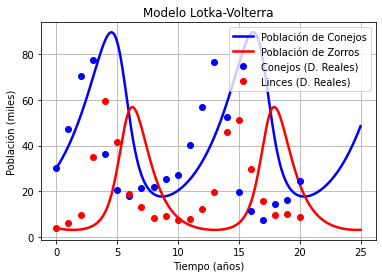

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Valor de las tasas (normalizadas):
r1 = 0.396 #(Tasa de reproducción de los conejos por unidad de tiempo.) +
r2 = 0.786 #(Tasa de mortalidad de los zorros por unidad de tiempo.) -
b1 = 0.016 #(Tasa de depredación de los conejos por parte de los zorros por unidad de tiempo.) -
b2 = 0.020  #(Tasa de beneficio de los zorros ante la depredación por unidad de tiempo.) +
ep = 0.1


#Condiciones iniciales
C0 = 30
Z0 = 4

#Datos reales
CR = [30, 47.2, 70.2, 77.4, 36.3, 20.6, 18.1, 21.4, 22, 25.4, 27.1,
      40.3, 57, 76.6, 52.3, 19.5, 11.2, 7.6, 14.6, 16.2, 24.7]
LR = [4, 6.1, 9.8, 35.2, 59.4, 41.7, 19, 13, 8.3, 9.1, 7.4, 8, 12.3,
      19.5, 45.7, 51.1, 29.7, 15.8, 9.7, 10.1, 8.6]

#Tamaño de paso y rango
a = 0
b = 25
h = 0.01
t = np.arange(a, b+h, h) #tiempo en años
n = len(t)
C = np.zeros(n)          #Poblacion de conejos en miles
Z = np.zeros(n)          #Poblacion de zorros en miles
C[0] = C0
Z[0] = Z0

#Ecuaciones a modelar
def f(C,Z,t):
    return r1*C - b1*C*Z - ep*C

def g(C,Z,t):
    return b2*C*Z - r2*Z - ep*Z

#Solución numérica
for i in range(n-1):
    k1 = h*f(C[i], Z[i], t[i])
    l1 = h*g(C[i], Z[i], t[i])
    
    k2 = h*f(C[i] + k1/2, Z[i] + l1/2, t[i] + h/2)
    l2 = h*g(C[i] + k1/2, Z[i] + l1/2, t[i] + h/2)
    
    k3 = h*f(C[i] + k2/2, Z[i] + l2/2, t[i] + h/2)
    l3 = h*g(C[i] + k2/2, Z[i] + l2/2, t[i] + h/2)
    
    k4 = h*f(C[i] + k3, Z[i] + l3, t[i] + h)
    l4 = h*g(C[i] + k3, Z[i] + l3, t[i] + h)
    
    C[i + 1] = C[i] + (k1 + 2*k2 + 2*k3 + 2*k4)*(1/6)
    Z[i + 1] = Z[i] + (l1 + 2*l2 + 2*l3 + 2*l4)*(1/6)

#Grafica de la solución

plt.plot(t, C,'b-', label = 'Población de Conejos', linewidth = 2.5)
plt.plot(t, Z,'r-', label = 'Población de Zorros', linewidth = 2.5)
plt.plot(CR, 'bo', label = 'Conejos (D. Reales)')
plt.plot(LR, 'ro', label = 'Linces (D. Reales)')
plt.title('Modelo Lotka-Volterra')
#plt.title('Modelo Lotka-Volterra: $\epsilon <r_{1}$')
plt.xlabel('Tiempo (años)')
plt.ylabel('Población (miles)')
plt.legend(loc=1)
plt.grid()
#v = (a,b,-0.05e7,7e7)
#plt.axis(v)


plt.show()

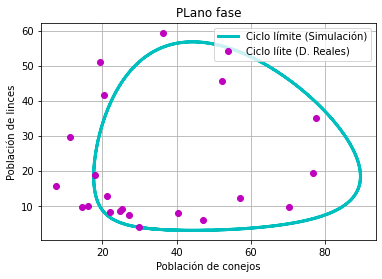

In [2]:
plt.plot(C,Z, 'c-', label = 'Ciclo límite (Simulación)', linewidth = 3)
plt.plot(CR,LR, 'mo', label = 'Ciclo líite (D. Reales)')
#plt.plot(r2/b2, r1/b1, 'ko')
#plt.text(r2/b2, r1/b1,'Punto de coexistencia')
#plt.plot(0,0, 'yo')
#plt.text(0,0,'Punto de extinción')
plt.title('PLano fase')
plt.xlabel('Población de conejos')
plt.ylabel('Población de linces')
plt.legend(loc=1)
plt.grid()
#v = (a,b,-0.05e7,7e7)
#plt.axis(v)